# Aldrich HW 1 

# Problem 1: 

Write a function in Python that uses the Forward Euler method to simulate the SIR model. Check your
work by first reproducing the three plots from Figure 1 of the Week 2 lecture notes. The parameters
are: N = 1000, I0 = 1, S0 = 999, with
• β = 1, γ = 0.5
• β = 1.5, γ = 0.5
• β = 2, γ = 0.5
Show that your code works by simply reproducing the plots exactly, but with your first name included
in the legend labels, e.g. “S Dan”, “I Dan” or something. Link to your code and turn in just the 3
plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [31]:
# forward euler 

def yourmom(S0, I0, R0, beta, gamma, t_final, dt):
    
    T = np.linspace(0, t_final, 500)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    S[0] = S0
    I[0] = I0
    R[0] = R0 
    
    N = S0 + I0 + R0 
    
    for i in range(len(T)):
        if i == 0:
            S[i] = S0
            I[i] = I0
            R[i] = R0
        
        else: 
            S[i] = S[i-1] + dt*(- beta*S[i-1]*I[i-1] / N) 
            I[i] = I[i-1] + dt*((beta*S[i-1]*I[i-1] / N) - gamma*I[i-1])
            R[i] = R[i-1] + dt*(gamma*I[i-1])
            
    return S, I, R, T



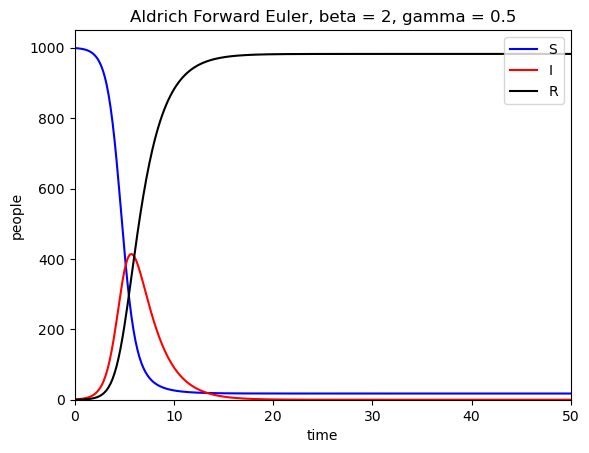

In [32]:
beta = 2
gamma = 0.5
max_time = 50 # days 
dt = 0.1

S0 = 999
I0 = 1
R0 = 0
N = S0 + I0 + R0

output = yourmom(S0, I0, R0, beta, gamma, max_time, dt)


fig,ax = plt.subplots()

ax.plot(output[3],output[0], c='blue', label='S')
ax.plot(output[3],output[1], c='red', label='I')
ax.plot(output[3],output[2], c='black', label='R')
ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05*N])
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.title(f'Aldrich Forward Euler, beta = {beta}, gamma = {gamma}')


plt.savefig(f'Aldrich_Forward_Euler_beta_{beta}_gamma_{gamma}.png') 

# Question 3: fsolve the final epidemic size equation 

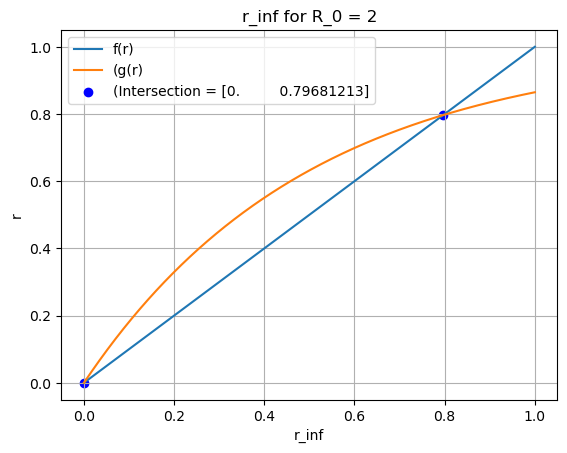

<Figure size 640x480 with 0 Axes>

In [115]:
def f(r):
    return r

def g(r, R_0):
    return 1 - np.exp(- R_0 * r)

# Difference
def difference(r=r_inf, R_0=R_0):
    return f(r) - g(r, R_0)

# intersection 
intersection = fsolve(difference, [0, 1])

r_inf = np.linspace(0, 1, 1000)
R_0 = 2
plt.plot(r_inf, f(r_inf), label='f(r)')
plt.plot(r_inf, g(r_inf, R_0), label=f'(g(r)')
plt.scatter(intersection, f(intersection), color='blue', label=f'(Intersection = {intersection}')


plt.xlabel('r_inf')
plt.ylabel('r')
plt.title(f'r_inf for R_0 = {R_0}')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(f'Aldrich_r_inf_R0_{R_0}.png') 

Text(0.5, 1.0, 'Aldrich r_inf test prediction , beta = 1, gamma = 0.5')

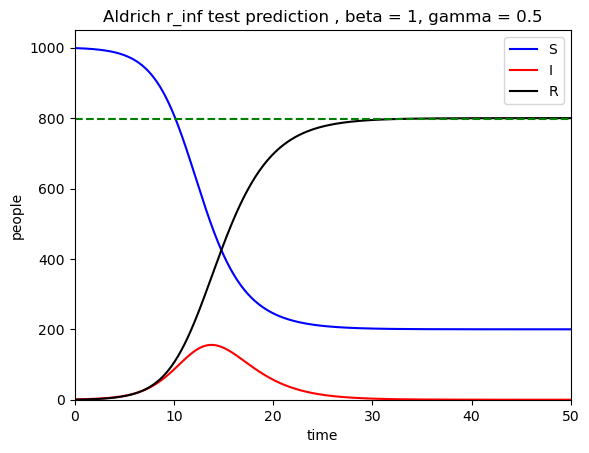

In [118]:
# Part D: test prediction with beta= 1 and gamma = 0.5: 



# USE SIR code 
beta = 1
gamma = 0.5
R_0 = beta / gamma 
predicted_r_inf = fsolve(difference, [0, 1]) #find the intersection for given values of beta and gamma 
#predicted_r_inf = intersection (this is 0.79681213 for beta=1 and gamma= 0.5)


max_time = 50 # days 
dt = 0.1

S0 = 999
I0 = 1
R0 = 0
N = S0 + I0 + R0


output = yourmom(S0, I0, R0, beta, gamma, max_time, dt)


fig,ax = plt.subplots()

ax.plot(output[3],output[0], c='blue', label='S')
ax.plot(output[3],output[1], c='red', label='I')
ax.plot(output[3],output[2], c='black', label='R')
ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05*N])
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.axhline(y=(0.79681213*N), color='green', linestyle='--', label='root')
plt.title(f'Aldrich r_inf test prediction , beta = {beta}, gamma = {gamma}')



# Question 4

disease-free equilibrium is stable when s < 1/ R0 and unstable otherwise. Using N = 10^6, and ε = 1 / N as your perturbation, produce a single figure using your simulation code and its output that illustrates this point. Write a caption that explains the principle of stability, and explain how your figure illustrates it.

In [43]:
def yourmom_with_perturbation(S0, I0, R0, beta, gamma, t_final, dt):
    
    T = np.linspace(0, t_final, 500)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    epsilon = np.zeros(len(T))
    
    S[0] = S0
    I[0] = I0
    R[0] = R0 
    
    N = S0 + I0 + R0 
    epsilon[0] = 1 / N
    
    for i in range(len(T)):
        if i == 0:
            S[i] = S0
            I[i] = I0
            R[i] = R0
            epsilon[i] = epsilon[0]
        
        else: 
            S[i] = S[i-1] + dt*(- beta*S[i-1]*I[i-1] / N) 
            epsilon[i] = epsilon[i - 1] + dt*(epsilon[i-1]*(beta*(S[i-1]/N) - gamma))
            I[i] = I[i-1] + dt*((beta*S[i-1]*I[i-1] / N) - gamma*I[i-1]) + epsilon[i]
            R[i] = R[i-1] + dt*(gamma*I[i-1])
            epsilon[i] = epsilon[i - 1] + dt*(epsilon[i-1]*(beta*(S[i-1]/N) - gamma))
            
            
    s = S / N
    i = I / N
    r = R / N
    
    rate = beta*s - gamma 
    epsilon = np.exp(rate*T)
     
    #return S, I, R, T, epsilon
    return s, i, r, T, epsilon 

In [48]:
# define the s_peak - everything below this of this will have a value < 1 / R_0, everything above will have a value > 1 / R_0 

def s_peak(beta, gamma):
    return gamma / beta

Text(0.5, 1.0, 'Aldrich Forward Euler, beta = 1, gamma = 0.5')

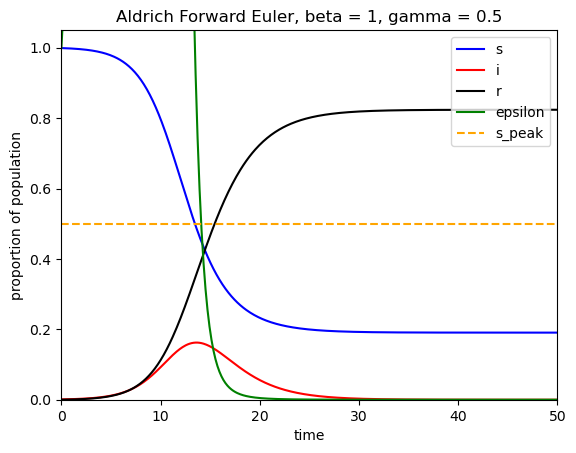

In [47]:
beta = 1
gamma = 0.5
max_time = 50 # days 
dt = 0.1

S0 = 999
I0 = 1
R0 = 0
N = S0 + I0 + R0

output = yourmom_with_perturbation(S0, I0, R0, beta, gamma, max_time, dt)


fig,ax = plt.subplots()

ax.plot(output[3],output[0], c='blue', label='s')
ax.plot(output[3],output[1], c='red', label='i')
ax.plot(output[3],output[2], c='black', label='r')
ax.plot(output[3],output[4], c='green', label='epsilon')
plt.axhline(y=s_peak(beta, gamma), color='orange', linestyle='--', label='s_peak')

ax.legend(loc = 'upper right')
ax.set_xlim([0, max_time])
ax.set_ylim( [0, 1.05])
ax.set_xlabel('time')
ax.set_ylabel('proportion of population')
plt.title(f'Aldrich Forward Euler, beta = {beta}, gamma = {gamma}')



s_peak is defined as gamma / beta, ,depitcted here with an orange dotted line. When epsilon is less than s_peak, di/dt reaches a critical point and begins to decrease. Therefore, when s_peak > 1/R_0, the exponential rate of epsilon, beta*s - gamma, is also > 0, leading to growth of the infected population. When s < 1/R_0, the exponential rate of epsilon < 0 (decay), leading to a stable equilibrium!